In [ ]:
!pip install

In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as npim
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving RealEstate.c.csv to RealEstate.c.csv
{'RealEstate.c.csv': b'location,area_sqft,bedrooms,bathrooms,parking,gym,age_of_house,price\r\nOdisha,1500,3,3,1,1,3,125000000\r\nDelhi,1300,4,4,1,1,4,145000000\r\nCuttack,2500,9,9,2,2,5,190000000\r\nMumbai,1200,5,4,1,1,3,200000000\r\nKolkata,1300,7,3,2,2,4,150230000\r\n'}


In [39]:
import pandas as pd

# The 'uploaded' variable is available from the kernel state, containing the uploaded file.
# Assuming 'RealEstate.csv' is the file that was uploaded.
# We get the filename from the keys of the 'uploaded' dictionary.
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   location      5 non-null      object
 1   area_sqft     5 non-null      int64 
 2   bedrooms      5 non-null      int64 
 3   bathrooms     5 non-null      int64 
 4   parking       5 non-null      int64 
 5   gym           5 non-null      int64 
 6   age_of_house  5 non-null      int64 
 7   price         5 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 452.0+ bytes


In [40]:
df.describe()

,area_sqft,bedrooms,bathrooms,parking,gym,age_of_house,price
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000e+00
mean,1560.000000,5.600000,4.60000,1.400000,1.400000,3.80000,1.620460e+08
std,536.656315,2.408319,2.50998,0.547723,0.547723,0.83666,3.171956e+07
min,1200.000000,3.000000,3.00000,1.000000,1.000000,3.00000,1.250000e+08
25%,1300.000000,4.000000,3.00000,1.000000,1.000000,3.00000,1.450000e+08
50%,1300.000000,5.000000,4.00000,1.000000,1.000000,4.00000,1.502300e+08
75%,1500.000000,7.000000,4.00000,2.000000,2.000000,4.00000,1.900000e+08
max,2500.000000,9.000000,9.00000,2.000000,2.000000,5.00000,2.000000e+08


In [41]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [42]:
df.columns = ["house_age", "distance_to_mrt", "num_convenience_stores","parking","gym",
              "latitude", "longitude", "price"]
df.head()

,house_age,distance_to_mrt,num_convenience_stores,parking,gym,latitude,longitude,price
0,Odisha,1500,3,3,1,1,3,125000000
1,Delhi,1300,4,4,1,1,4,145000000
2,Cuttack,2500,9,9,2,2,5,190000000
3,Mumbai,1200,5,4,1,1,3,200000000
4,Kolkata,1300,7,3,2,2,4,150230000


In [43]:
df.columns = ["house_age", "distance_to_mrt", "num_convenience_stores","parking","gym",
              "latitude", "longitude", "price"]

# Location influence
df["location_score"] = df["latitude"] + df["longitude"]

# Accessibility score
df["accessibility"] = df["num_convenience_stores"] / (df["distance_to_mrt"] + 1)

df.head()

,house_age,distance_to_mrt,num_convenience_stores,parking,gym,latitude,longitude,price,location_score,accessibility
0,Odisha,1500,3,3,1,1,3,125000000,4,0.001999
1,Delhi,1300,4,4,1,1,4,145000000,5,0.003075
2,Cuttack,2500,9,9,2,2,5,190000000,7,0.003599
3,Mumbai,1200,5,4,1,1,3,200000000,4,0.004163
4,Kolkata,1300,7,3,2,2,4,150230000,6,0.005380


In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as npim
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

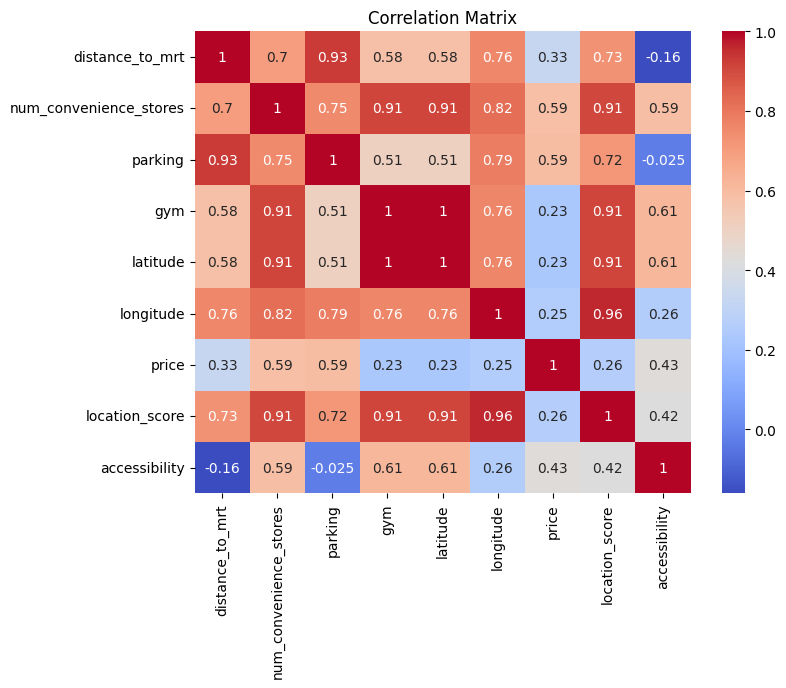

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('house_age', axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [46]:
X = df.drop(["price", "house_age"], axis=1)
y = df["price"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
import numpy as np

print("Multiple Linear Regression Results")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Multiple Linear Regression Results
MAE: 24532885.59744689
RMSE: 24532885.59744689
R2 Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [50]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df

,Feature,Coefficient
0,distance_to_mrt,-1.039615e+05
1,num_convenience_stores,8.697166e+06
2,parking,2.641721e+07
3,gym,-5.316117e+06
4,latitude,-5.316117e+06
5,longitude,-3.028838e+06
6,location_score,-8.344955e+06
7,accessibility,5.421712e+03


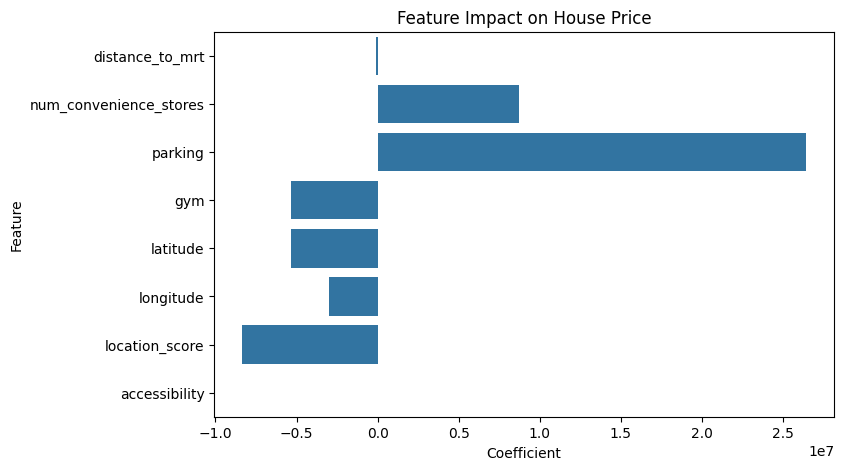

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=coeff_df)
plt.title("Feature Impact on House Price")
plt.show()

In [79]:
sample_house = pd.DataFrame([{
    "distance_to_mrt": -10600500,
    "num_convenience_stores": 5,
    "parking": 1, # Example value, assuming a parking spot
    "gym": 1, # Example value, assuming gym access
    "latitude": 24.98,
    "longitude": 121.54,
    "location_score": 20000.98 + 121.54,
    "accessibility": 1 / (200 + 1)
}])

predicted_price = model.predict(sample_house)
print("Predicted House Price:", round(predicted_price[0], 2))

Predicted House Price: 933914584179.11
